In [1]:
#import libraries
import pulp as p 
import matplotlib.pyplot as plt
import numpy as np
import sympy as sym

In [2]:
# Create problem Variables  
x = p.LpVariable("x", lowBound = 0)   # Create a variable x >= 0 
y = p.LpVariable("y", lowBound = 0)   # Create a variable y >= 0 
    
def LPP_Solver(objective, constraints, maximum):
    # Create a LP Minimization problem 
    if maximum==True:
        Lp_prob = p.LpProblem('Problem', p.LpMaximize)  
    else:
        Lp_prob = p.LpProblem('Problem', p.LpMinimize) 

    # Objective Function 
    Lp_prob += objective 

    # Constraints: 
    for c in constraints:
        Lp_prob += c

    # Display the problem 
    #print(Lp_prob) 

    status = Lp_prob.solve()   # Solver 
    print(p.LpStatus[status])   # The solution status 

    # Printing the final solution 
    print(p.value(x), p.value(y), p.value(Lp_prob.objective))


# CASE 1: Unbounded region single solution

### maximal solution

In [3]:
#define objective function
objective = 3 * x + 5 * y
#define the constraints
constraints = [ 2 * x + 3 * y >= 12, -x + y <= 3, x >= 4, y <= 3 ]
#maximal or minimal solution?
maximum = True
#call the solver function
LPP_Solver(objective, constraints, maximum)


Unbounded
4.0 3.0 27.0


(0.0, 11.0)

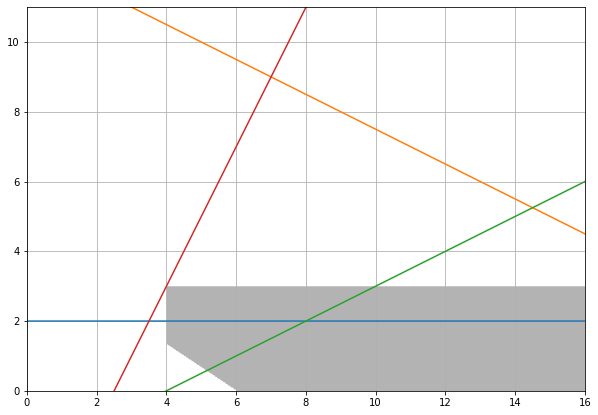

In [12]:
d = np.linspace(0,25,1000)
x,y = np.meshgrid(d,d)
constraints = [ 2 * x + 3 * y >= 12, -x + y <= 3, x >= 4, y <= 3 ]
plt.figure(figsize=(10,10));
plt.grid(True, which='both')
plt.imshow( (constraints[0] & constraints[1] & constraints[2] & constraints[3]).astype(int) , 
                extent=(x.min(),x.max(),y.min(),y.max()),origin="lower", cmap="Greys", alpha = 0.3);
x = np.linspace(0, 16, 2000)
# y >= 2
y1 = (x*0) + 2
# 2y <= 25 - x
y2 = (25-x)/2.0
# 4y >= 2x - 8 
y3 = (2*x-8)/4.0
# y <= 2x - 5 
y4 = 2 * x -5

# Make plot
plt.plot(x, 2*np.ones_like(y1))
plt.plot(x, y2)
plt.plot(x, y3)
plt.plot(x, y4)
plt.xlim(0,16)
plt.ylim(0,11)